## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

> There are 294478 rows in the dataset.

c. The number of unique users in the dataset.

In [4]:
unique_users = df.drop_duplicates(subset='user_id') 
unique_users.shape[0]
 


290584

d. The proportion of users converted.

In [5]:
df.query("converted == 1").count()[0]/df.shape[0] 

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query("landing_page != 'new_page' and group!= 'treatment'").count()[0]

145274

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [10]:
#find no of columns and non-empty fields in dataset
print('dataset information')
df2.info()

dataset information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
print("There are {} unique users in the df2 dataset".format(df2['user_id'].nunique()))

There are 290584 unique users in the df2 dataset


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
duplicate_user = df2[df2.duplicated(subset='user_id')==True].user_id.item()
duplicate_user
print("The user_id that was repeated in df2 is {}.".format(duplicate_user))

The user_id that was repeated in df2 is 773192.


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id']==duplicate_user]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2=df2.drop_duplicates(['user_id'],keep="first")

In [16]:
#to check if duplicate has been dropped. The first 
df2[df2['user_id']==duplicate_user]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
conversion_rate = df2['converted'].mean()
print("The probability of an individual converting regardless of the page they receive is {0:.5}.".format(conversion_rate))

The probability of an individual converting regardless of the page they receive is 0.1196.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
conversion_control = df2[df2['group'] == 'control']['converted'].mean()
print(" Given that an individual was in the control group, the probability they converted is {0:.5}.".format(conversion_control))

 Given that an individual was in the control group, the probability they converted is 0.12039.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
conversion_treatment = df2[df2['group'] == 'treatment']['converted'].mean()
print(" Given that an individual was in the treatment group, the probability they converted is {0:.5}.".format(conversion_treatment))

 Given that an individual was in the treatment group, the probability they converted is 0.11881.


d. What is the probability that an individual received the new page?

In [20]:
#find rows with landing page as new page
new_page_rows = len(df2.query("landing_page == 'new_page'"))
#find total no of rows
total_rows = df2.shape[0]
print("The probability that an individual received the new page is {0:.5}".format(new_page_rows/total_rows))


The probability that an individual received the new page is 0.50006


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Based on the results : 

>The probability of an individual converting regardless of the page they receive is 0.1196.

>Given that an individual was in the control group, the probability they converted is 0.12039.

>Given that an individual was in the treatment group, the probability they converted is 0.11881.

>Given that an individual received the new page, the probability they converted is 0.50006.

>The probablity users converted in both control and treatment group are pretty similar to each other and  probability of an individual converting regardless of the page they receive. 

Thus, there is no evidence that new page leads to more conversions as noted by the probability of 50% which doesn't prove that all new treatment page will be more converted.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new = df2['converted'].mean()
# Display new converted success rate
print("Convert rate for p_new under the null is {}".format(p_new))

Convert rate for p_new under the null is 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# Compute old converted success rate, which equals to the converted success rate regardless of page
p_old = df2['converted'].mean()
# Display old converted success rate
print("Convert rate for p_new under the null is {}".format(p_old))

Convert rate for p_new under the null is 0.11959708724499628


c. What is $n_{new}$?

In [23]:
#Compute the number of unique users who has new page using df2 dataframe
N_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
#display the number of unique users who has new page
print('n_new is', N_new)

n_new is 145310


d. What is $n_{old}$?

In [24]:
#Compute the number of unique users who has old page  using df2 dataframe
N_old = df2.query('landing_page == "old_page"')['user_id'].nunique() 
#display the number of unique users who has new page
print('n_old is', N_old)


n_old is 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#Simulate  n_new  transactions with a convert rate of  p_new  under the null
new_page_converted = np.random.choice([0,1],N_new, p=(p_new,1-p_new))
#Display new_page_converted
new_page_converted 

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#Simulate  n_old  transactions with a convert rate of  p_old  under the null
old_page_converted = np.random.choice([0,1],N_old, p=(p_old,1-p_old))
#Display old_page_converted
old_page_converted

array([1, 1, 0, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#Compute the probablity of new page converted rate
new_page_converted.mean()

0.8796435207487441

In [28]:
#Compute the probablity of old page converted rate
old_page_converted.mean()

0.8796549967647342

In [29]:
#Find  pnew - pold  for your simulated values from part (e) and (f).
new_page_converted.mean() - old_page_converted.mean()

-1.1476015990163901e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
#Import timeit package
import timeit
start = timeit.default_timer()
# Create sampling distribution for difference in completion rates
# with boostrapping
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],N_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],N_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
#Compute python running time.
stop = timeit.default_timer()
print("The python run time for the array is {0:.5} seconds".format(stop-start))
p_diffs = np.array(p_diffs)

The python run time for the array is 482.22 seconds


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  10.,  104.,  575., 1686., 3072., 2826., 1350.,  325.,   46.,
           6.]),
 array([-0.00471238, -0.00374057, -0.00276875, -0.00179694, -0.00082512,
         0.00014669,  0.00111851,  0.00209032,  0.00306214,  0.00403395,
         0.00500577]),
 <a list of 10 Patch objects>)

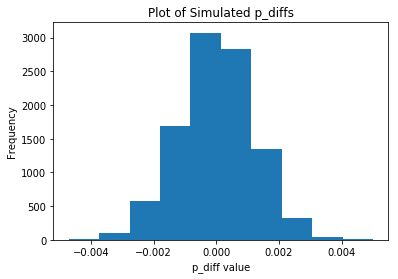

In [31]:
plt.xlabel('p_diff value')
plt.ylabel('Frequency')
plt.title('Plot of Simulated p_diffs');
plt.hist(p_diffs)

In [34]:
# Create number of users with all new_page users and all new_page users
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

# Compute actual converted rate
actual_cvt_new = float(convert_new)/ float(N_new) 
actual_cvt_old = float(convert_old)/ float(N_old)

In [35]:
# Compute observed difference in converted rate 
obs_diff = actual_cvt_new - actual_cvt_old

# Display observed difference in converted rate 
obs_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
p_diff_orig = df[df['landing_page'] == 'new_page']['converted'].mean() -  df[df['landing_page'] == 'old_page']['converted'].mean()
print('p_diff from ab_data.csv is {}.'.format(p_diff_orig))

p_diff from ab_data.csv is -0.0016367945992569882.


In [37]:
p_diffs = np.array(p_diffs)
p_diff_proportion = (p_diff_orig < p_diffs).mean()
print('The proportion of p_diffs that are greater than p_diffs from ab_data.csv is {}.'.format(p_diff_proportion))


The proportion of p_diffs that are greater than p_diffs from ab_data.csv is 0.9127.


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>We are calculating p- value. If null hypothesis ($H_{0}$) is true pvalue gives the probability of statistics tested.In this case, the new page doesn't have better conversion rates than the old page.

>Since our p-value is very large, observing our statistic from the null is very likely, therefore we fail to reject the null. we can't conclude that there is a difference between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm
from scipy.stats import norm

# Calculate number of conversion for both types of pages
convert_old = len(df2[(df2['landing_page'] == 'old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page'] == 'new_page')&(df2['converted']==1)])

# Calculate number of rows associated with the old page and new page
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]

print('The number of conversion for old page is {}.'.format(convert_old))
print('The number of conversion for new page is {}.'.format(convert_new))
print('The number of rows associated with the old page are {}.'.format(n_old))
print('The number of rows associated with the new page are {}.'.format(n_new))

The number of conversion for old page is 17489.
The number of conversion for new page is 17264.
The number of rows associated with the old page are 145274.
The number of rows associated with the new page are 145310.


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
#Find test statstics
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print('The z_score is {}.'.format(z_score))
print('The p_value is {}.'.format(p_value))

The z_score is -1.3109241984234394.
The p_value is 0.9050583127590245.


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>_zscore is a measure of how many standard deviations below or above the population mean a raw score is._

>We find that the z-score of 1.3109241984234394 is less than the critical value of 1.6448536269514722 which means we can't reject the null hypothesis.we find that old page conversions are slightly better than new page conversions. Even though the values are different from findings in parts j and k but it suggests there is no significant difference between old page and new page conversions.

>Because we have picked a significance level 95% and it's a one-tail test, a z-score past 1.65 and a p-value smaller than 0.05 will be significant. Since our z-value is 1.31, which didn't past 1.65, and our p-value is 0.9, which is larger than 0.05, the difference is not significant. We fail to reject the null hypothesis just like what we found in parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>__Logistic Regression, due to the fact that response variable is categorical variable.__

>__Logistic regression is multiple regression but with an outcome variable that is a categorical variable and predictor variables that are continuous.__



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
# Create a copy of df2 dataset to a new one.
df2_copy = df2.copy()

In [41]:
# create a column with an intercept
df2_copy['intercept'] = 1
#create a dummy variable column for which page each user received
df2_copy= df2_copy.join(pd.get_dummies(df2_copy['landing_page']))
# create 'ab_page' column with dummy  variables '1' for treatment, '0' for control
df2_copy['ab_page'] = df2_copy['group'].apply(lambda x: 1 if x == 'treatment' else 0)
df2_copy.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
#Create Logit regression model for converted variable and  ab_page, and us control as baseline
log_mod = sm.Logit(df2_copy['converted'], df2_copy[['intercept','ab_page']]) 
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:23:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

__In this logistic regression model we stated the following hypotheses:__

> __$H_{0}$ NULL__ : The type of landing page does not have statistically significant impact on the fact whether visitor will be converted or not 

> __$H_{1}$ ALT__ : The type of landing page does not have statistically significant impact on the fact whether visitor will be converted or not 

$$H_0: p_{new} - p_{old} = 0$$$$H_1: p_{new} - p_{old} != 0$$

P-value associated with 'ab_page' is 0.190. It differs from the value in Part 2, because the null and alternative hypotheses are different from Part 2. In this regression model, the null hypothesis is that the old page and new page have no difference in conversion rate, and the alternative is vice versa. However, in Part 2, the null hypothesis is that the old page is the same or better than new page in terms of conversion rate, and the alternative is vice versa.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>There are other factors besides landing page that might influence conversion rates during a visit, may include the  time of the day, country of residency, number of visits prior to this visit, etc..

>Considering the timestamp as an additinal variable, we can check if the converted rate depends on certain time of the day or certain day when user browses the website. This variable can be further broken down as it is a categorical variable and conversion can be looked at based on time of day e.g "Morning, afternoon, and evening", or time of the week; "weekday and weekend".

>Adding some of these other factors can help prevent biased results and get a better understanding of the conversion. However, adding too many factors can result in an overspecified model that has less precise estimates. Also features like multicollinearity and Simpson's paradox may occur.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
#Join ab dataset with country dataset
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2_copy.set_index('user_id'), how='left')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [45]:
# Count the number of users in each country in the dataset
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [46]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new = df_new.drop('CA', axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0


In [47]:
#Create Logit regression model for conveted and country, and use the CA and old page as baseline
model_country = sm.Logit(df_new['converted'],df_new[['intercept','new_page','UK','US']])
results_country = model_country.fit()
print (results_country.summary())

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        15:23:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.

In [48]:
print ("Interpreting Result :")
print("For every new_page unit decrease, the conversion rate will be {0:.2%} more likely to happen,holding all other varibles constant.".format((1/np.exp(-0.0149))-1))
print("For every unit for UK increase, the conversion rate will be  {0:.2%} more likely to happen, holding all other varibles constant.".format((np.exp(0.0506))-1))
print("For every unit for US increase, the conversion rate will be  {0:.2%} more likely to happen, holding all other varibles constant.".format((np.exp(0.0408))-1))

Interpreting Result :
For every new_page unit decrease, the conversion rate will be 1.50% more likely to happen,holding all other varibles constant.
For every unit for UK increase, the conversion rate will be  5.19% more likely to happen, holding all other varibles constant.
For every unit for US increase, the conversion rate will be  4.16% more likely to happen, holding all other varibles constant.


>__The p-values for the new page, UK and US are all above 0.05 and it means that they are not statistically significant.__

>__Thus, country does not affect the rate of conversion and we fail to reject the null hypothesis.__ 

>__On the other hand, Pseudo R-squared is greater in this case and it means a better fit.__

>__This means that none of the factors or variables above are statistically significant in explaining the conversion rate.__

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
#Create a new intereacton variable between new page and country US and UK
df_new['UK_new_page'] = df_new['new_page']* df_new['UK']
df_new['US_new_page'] = df_new['new_page']* df_new['US']

In [51]:
#Create logistic regression for the intereaction variable between new page and country using dummy variable
logit4 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result4 = logit4.fit()
print(result4.summary())


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        15:25:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page       -0.0674    

In [52]:
#exponentiated the CV to inteprete the result
np.exp(result4.params)

intercept      0.134794
new_page       0.934776
UK_new_page    1.081428
US_new_page    1.048001
UK             1.011854
US             1.017682
dtype: float64

<a id='conclusions'></a>
## Conclusions

### __Interpreting Results:__

>From the above Logit Regression Results, we can see the coefficient of intereaction variable "UK_new_page" and "US_new_page" are different from the coefficient of new_page itself.

>Also,only intercept's p-value is less than 0.05, which is statistically significant enough for the conversion rate. Other varables in the summary are not statistically significant. 

>Additionally, Z-score for all X variables are not large enough to be significant for predicting converted rate.

Therefore, the country a user lives is not significant on the converted rate considering the page the user land in.

>_ceteris paribus_ - __holding all other varibles constant__

>For every unit for new_page decreases, convert will be 7.0% more likely to happen, _ceteris paribus_.

>The conversion rate is 1.08 times more likely to happen for UK and new page users than CA and new page users, _ceteris paribus_.

>The conversion rate is 1.04 times more likely to happen for US and new page users than CA and new page users, _ceteris paribus_.

>The conversion rate is 1.18 % more likely to happen for the users in UK than CA, _ceteris paribus_.

>The conversion rate is 1.76 % more likely to happen for the users in US than CA, _ceteris paribus_.

__When adding both page and country as predictors to the regression model, the coefficient values and p-values didn't change much. All p-values are still large in this new model, which means they have no significant impact on conversion.__